In [1]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 5.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as tsm

In [3]:
def acf1(x, nlags=None, acf_type="correlation", pacf=False, ax=None, **kwargs):
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == "correlation":
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = "PACF"
    else:
        if acf_type == "correlation":
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = "ACF"
        elif acf_type == "covariance":
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = "ACoV"

    if ax is None:
        ax = plt.gca()
 
    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    if acf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

In [4]:
def compute_innovations(x):
    fit = sm.tsa.arima.ARIMA(x, order=(1, 0, 0), enforce_stationarity=False, enforce_invertibility=False).fit()
    x_hats = [0]
    e = np.array([x[0]])

    for i in np.arange(len(x) - 1):
        forecast_value_new = fit.get_prediction(len(x[0:i+1]), len(x[0:i+1])).predicted_mean
        x_hats.append(*forecast_value_new)
        e_new = x[i+1] - x_hats[i+1]
        e = np.append(e, e_new)
    
    return e

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


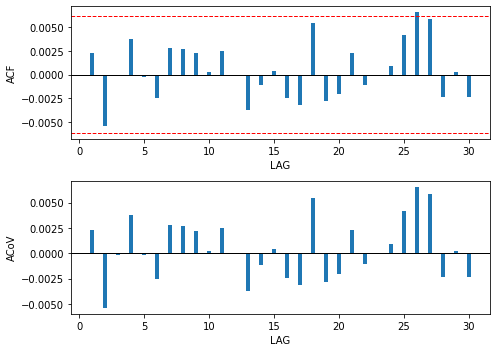

In [6]:
sim = tsm.arima_process.arma_generate_sample(ar=[1, -.5], ma=[1, 0], nsample=100000)
innov = compute_innovations(sim)

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))

acf1(innov, nlags=30, ax=axes[0], width=.3)
acf1(innov, nlags=30, acf_type="covariance", ax=axes[1], width=.3)

fig.tight_layout()
plt.show()